# PROBLEM 2 : ML CLASSIFICATION LOGISTIC REGRESSION

In [2]:
#LIB IMPORT:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape


(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


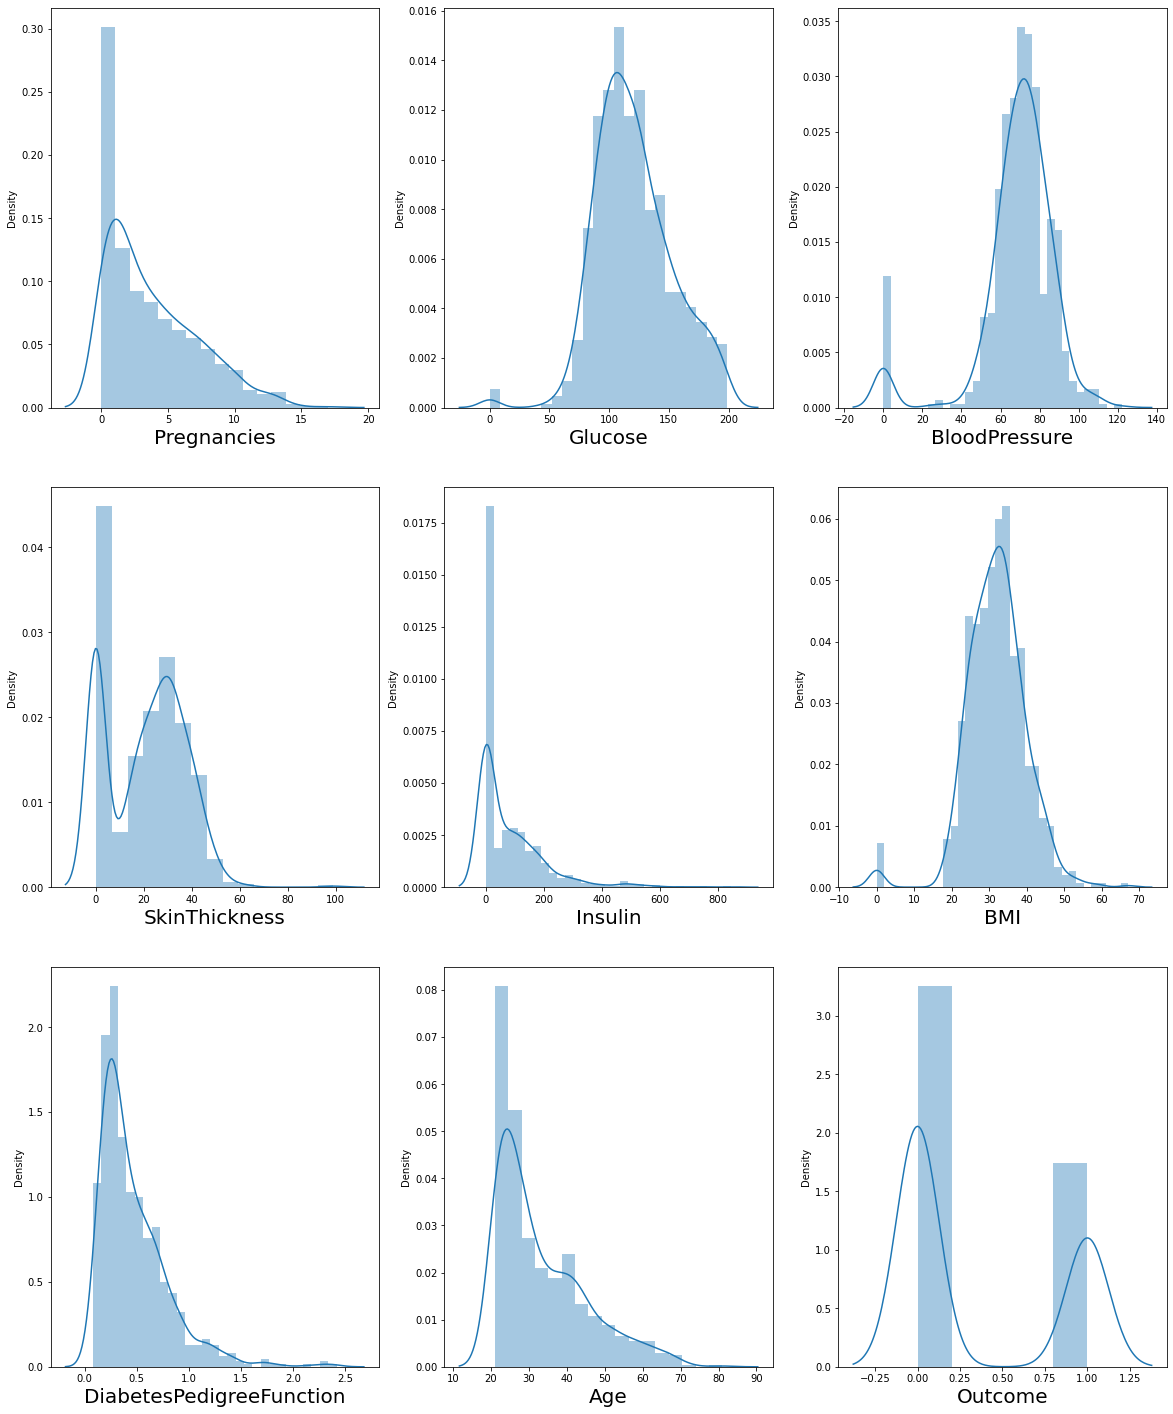

In [5]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [4]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].replace(0,data['DiabetesPedigreeFunction'].mean())

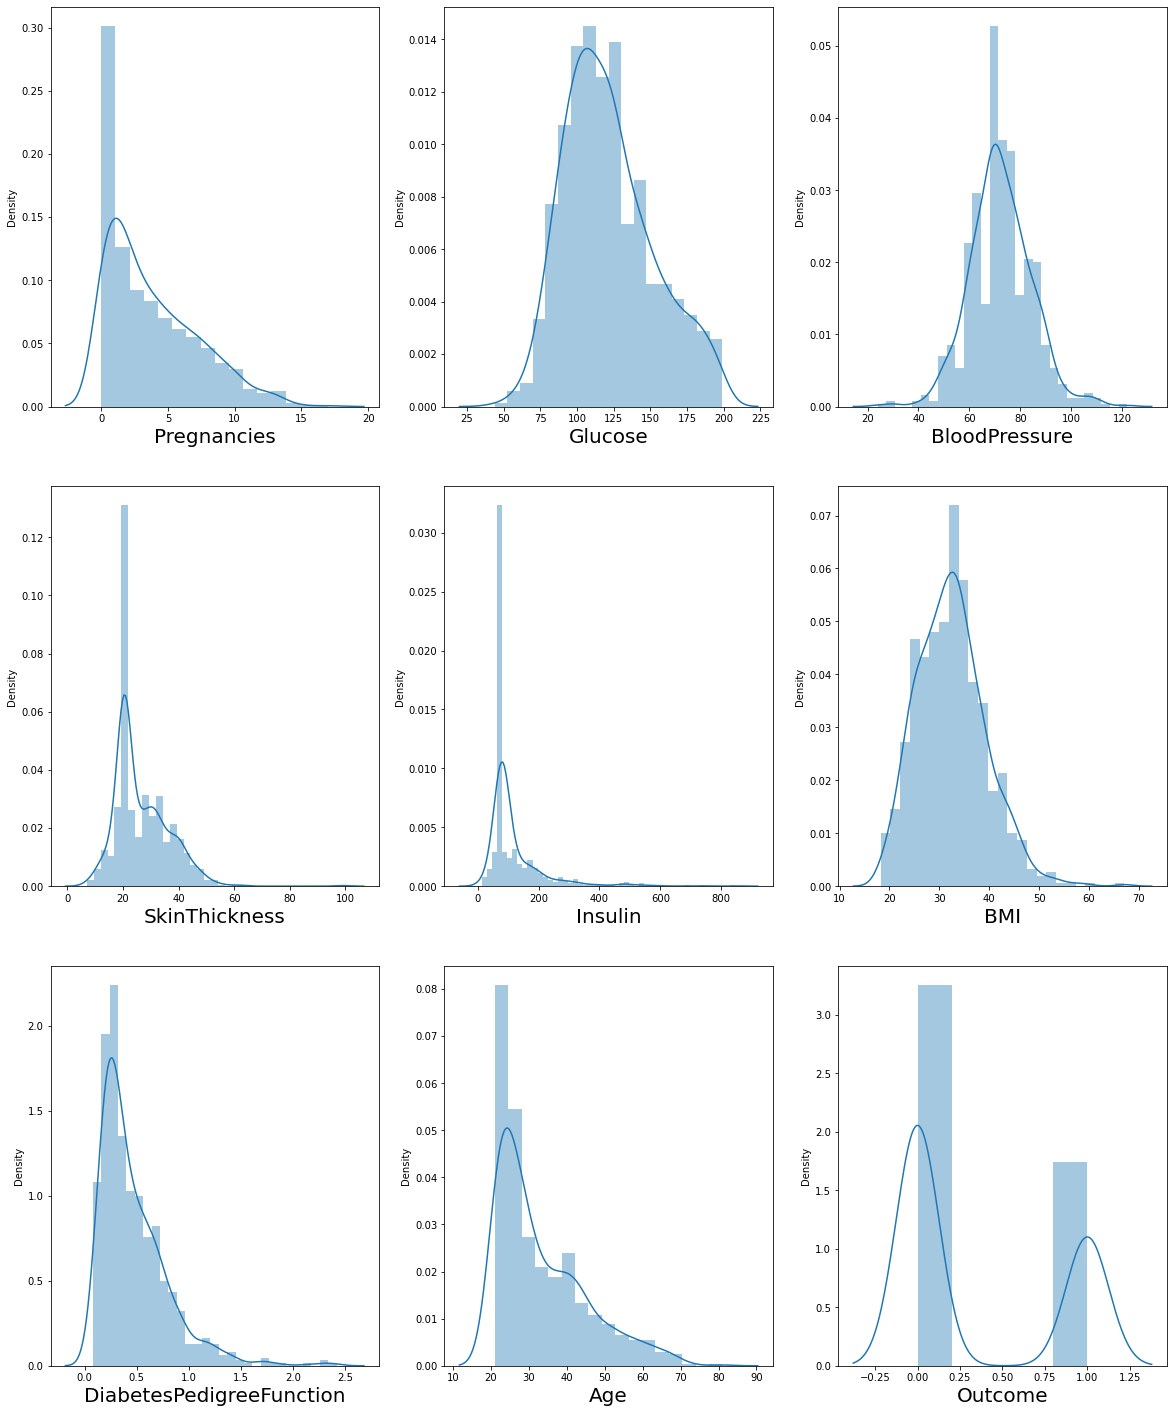

In [7]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [5]:
df_features=data.drop('Outcome',axis=1)

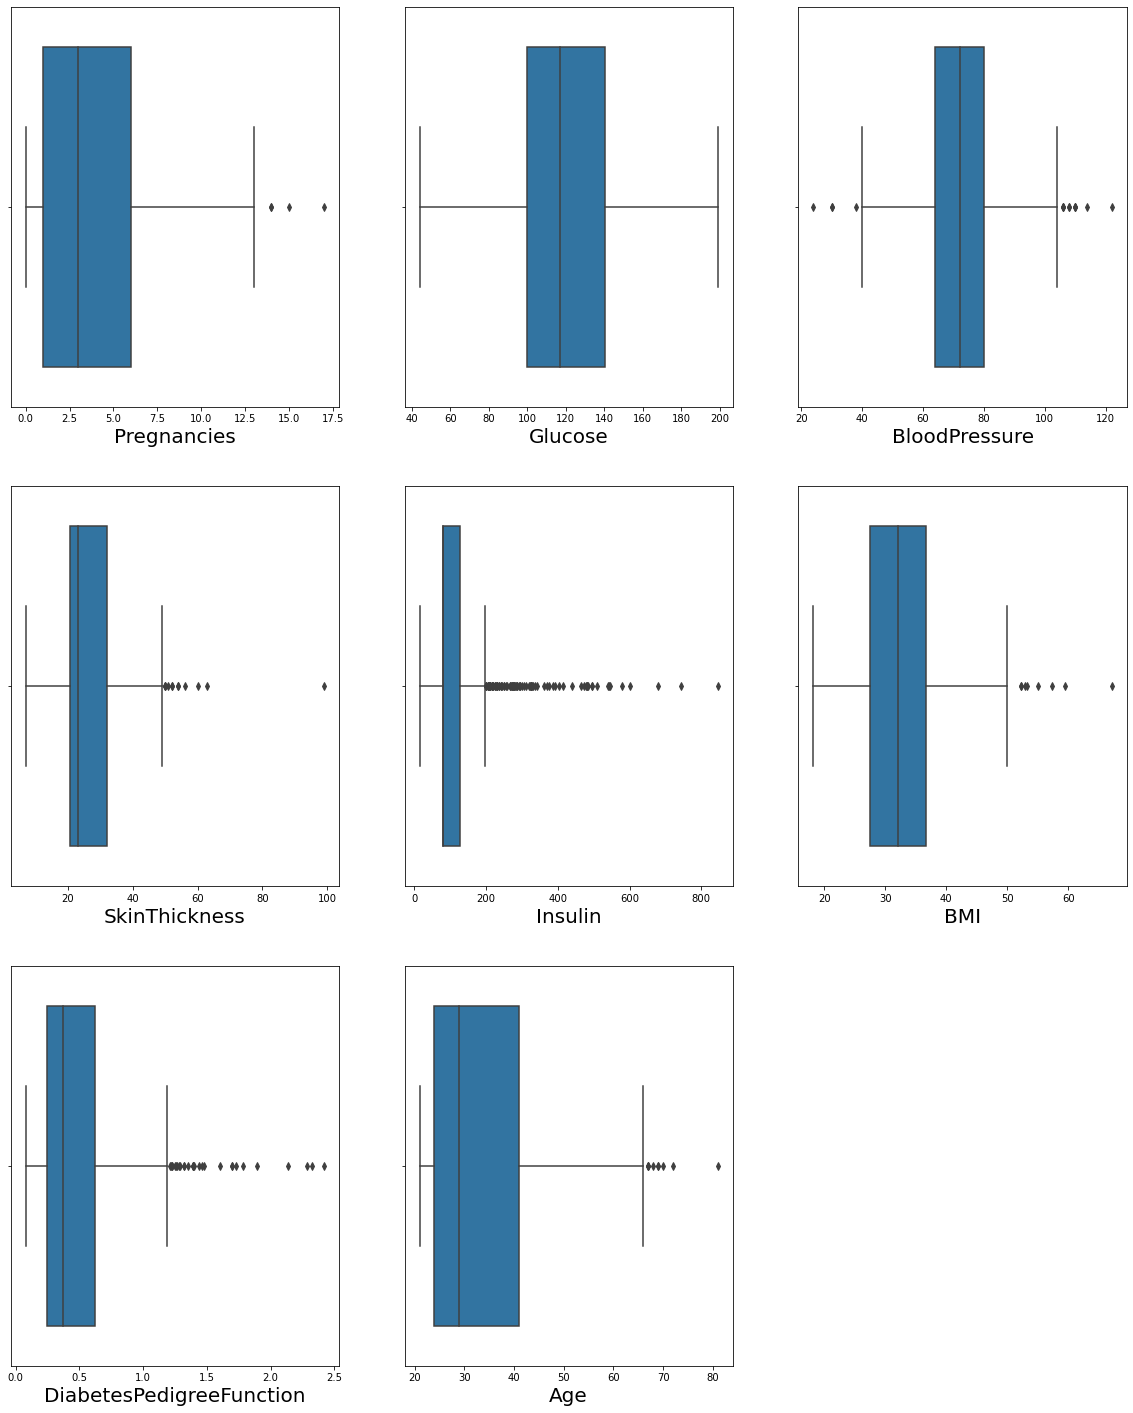

In [9]:
plt.figure(figsize=(20,25))
graph=1
for column in df_features:
    if graph<=30:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()    

In [10]:
data.shape

(768, 9)

In [6]:
q1=data.quantile(0.25)
q1

Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64

In [7]:
q3=data.quantile(0.75)
q3

Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

In [8]:
iqr=q3-q1
iqr

Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64

In [9]:
preg_high=q3.Pregnancies+(1.5*iqr.Pregnancies)
preg_high

13.5

In [10]:
ix=np.where(data['Pregnancies'] > preg_high)
ix

(array([ 88, 159, 298, 455], dtype=int64),)

In [11]:
data=data.drop(data.index[ix])
data.shape

(764, 9)

In [12]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [13]:
bp_high=q3.BloodPressure+(1.5*iqr.BloodPressure)
bp_high

104.0

In [14]:
ix=np.where(data['BloodPressure'] > bp_high)
ix

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

In [15]:
data=data.drop(data.index[ix])
data.shape

(754, 9)

In [16]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
st_high=q3.SkinThickness+(1.5*iqr.SkinThickness)
st_high

49.1953125

In [18]:
ix=np.where(data['SkinThickness'] > st_high)
ix

(array([ 56,  84,  96, 116, 146, 205, 267, 269, 437, 523, 569, 581],
       dtype=int64),)

In [19]:
data=data.drop(data.index[ix])
data.shape

(742, 9)

In [20]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
in_high=q3.Insulin+(1.5*iqr.Insulin)
in_high

198.42578125

In [22]:
ix=np.where(data['Insulin'] > in_high)
ix

(array([  8,  13,  16,  20,  31,  39,  52,  53,  55,  71,  90, 104, 124,
        131, 136, 144, 152, 175, 184, 188, 195, 203, 208, 216, 219, 235,
        236, 242, 246, 265, 272, 273, 282, 283, 294, 305, 320, 344, 345,
        348, 354, 359, 372, 376, 379, 393, 396, 399, 408, 409, 435, 440,
        462, 467, 468, 469, 493, 501, 519, 521, 526, 527, 535, 541, 554,
        563, 572, 584, 586, 590, 623, 633, 635, 648, 654, 660, 669, 674,
        681, 684, 687, 689, 695, 722, 727], dtype=int64),)

In [23]:
data=data.drop(data.index[ix])
data.shape

(657, 9)

In [24]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [25]:
dpf_high=q3.DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction)
dpf_high

1.2

In [26]:
ix=np.where(data['DiabetesPedigreeFunction'] > dpf_high)
ix

(array([  4,  11,  38,  47,  83, 124, 158, 184, 206, 208, 218, 246, 259,
        279, 314, 325, 457, 505, 526, 529, 530, 563, 565], dtype=int64),)

In [27]:
data=data.drop(data.index[ix])
data.shape

(634, 9)

In [28]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
629,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
630,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
631,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
632,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [29]:
bmi_high=q3.BMI+(1.5*iqr.BMI)
bmi_high

50.25

In [30]:
ix=np.where(data['BMI'] > bmi_high)
ix

(array([100, 157, 242], dtype=int64),)

In [31]:
data=data.drop(data.index[ix])
data.shape

(631, 9)

In [32]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [33]:
AGE_high=q3.Age+(1.5*iqr.Age)
AGE_high

66.5

In [34]:
ix=np.where(data['Age'] > AGE_high)
ix

(array([ 98, 291, 366, 370, 396, 440, 543, 549, 558], dtype=int64),)

In [35]:
data=data.drop(data.index[ix])
data.shape

(622, 9)

In [36]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [37]:
bp_low=q1.BloodPressure-(1.5*iqr.BloodPressure)
bp_low

40.0

In [38]:
ix=np.where(data['BloodPressure'] < bp_low)
ix

(array([ 13, 481, 483], dtype=int64),)

In [39]:
data=data.drop(data.index[ix])
data.shape

(619, 9)

In [40]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


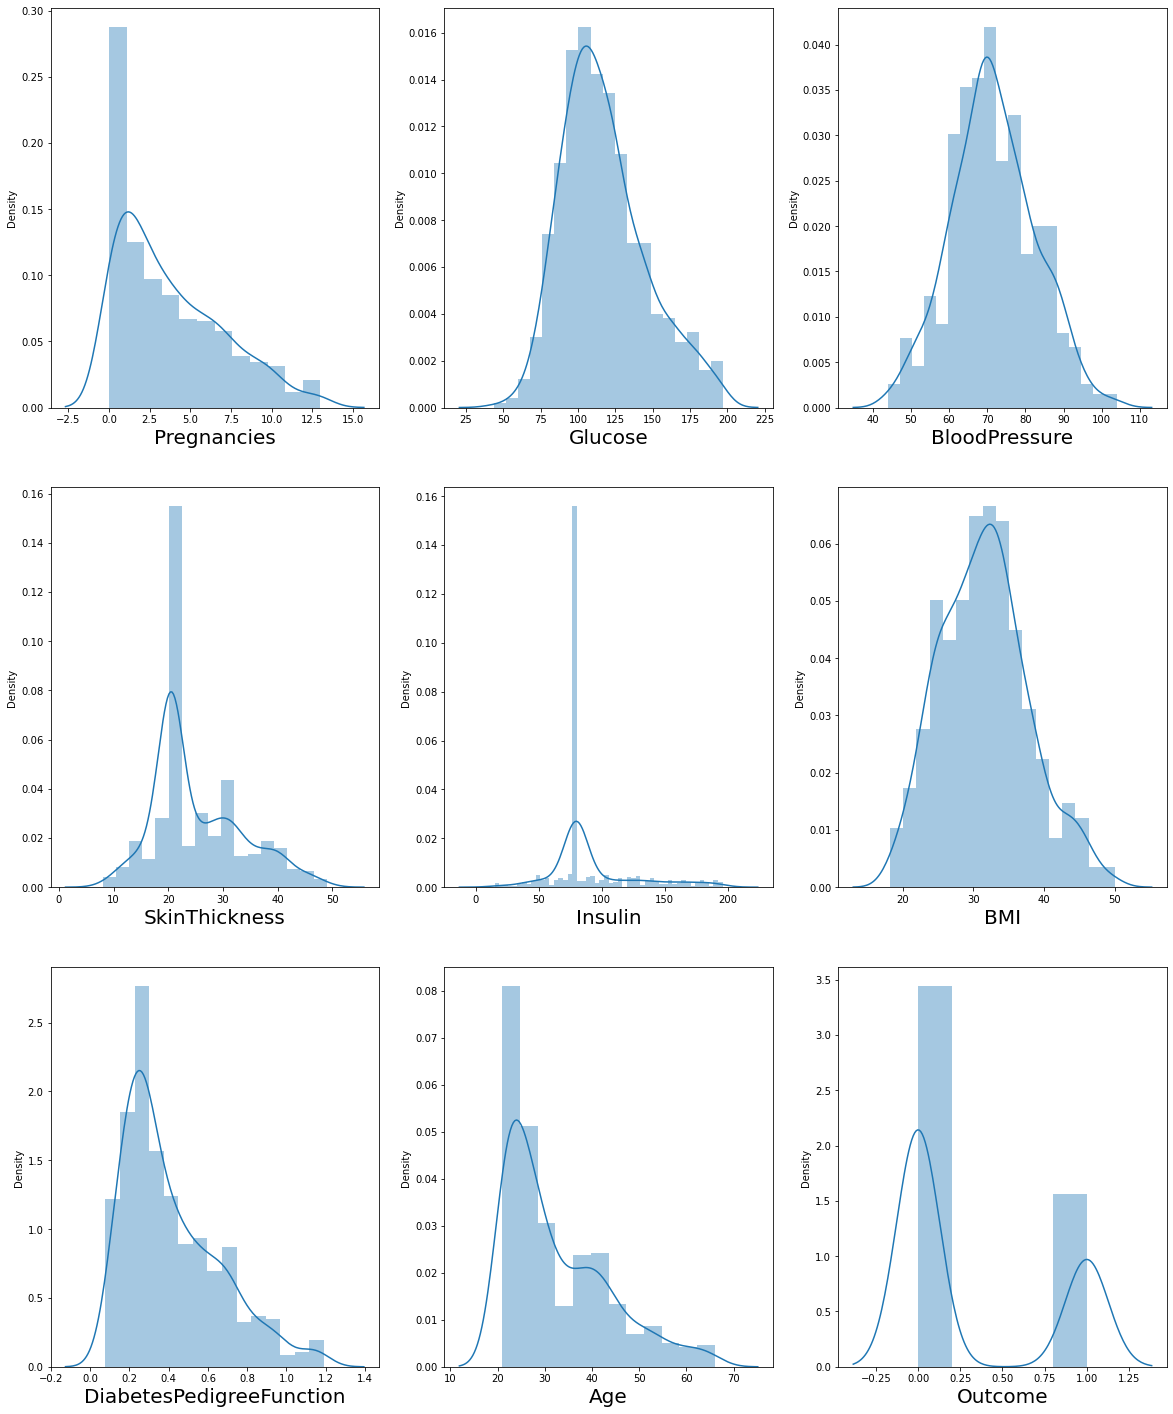

In [46]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [41]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

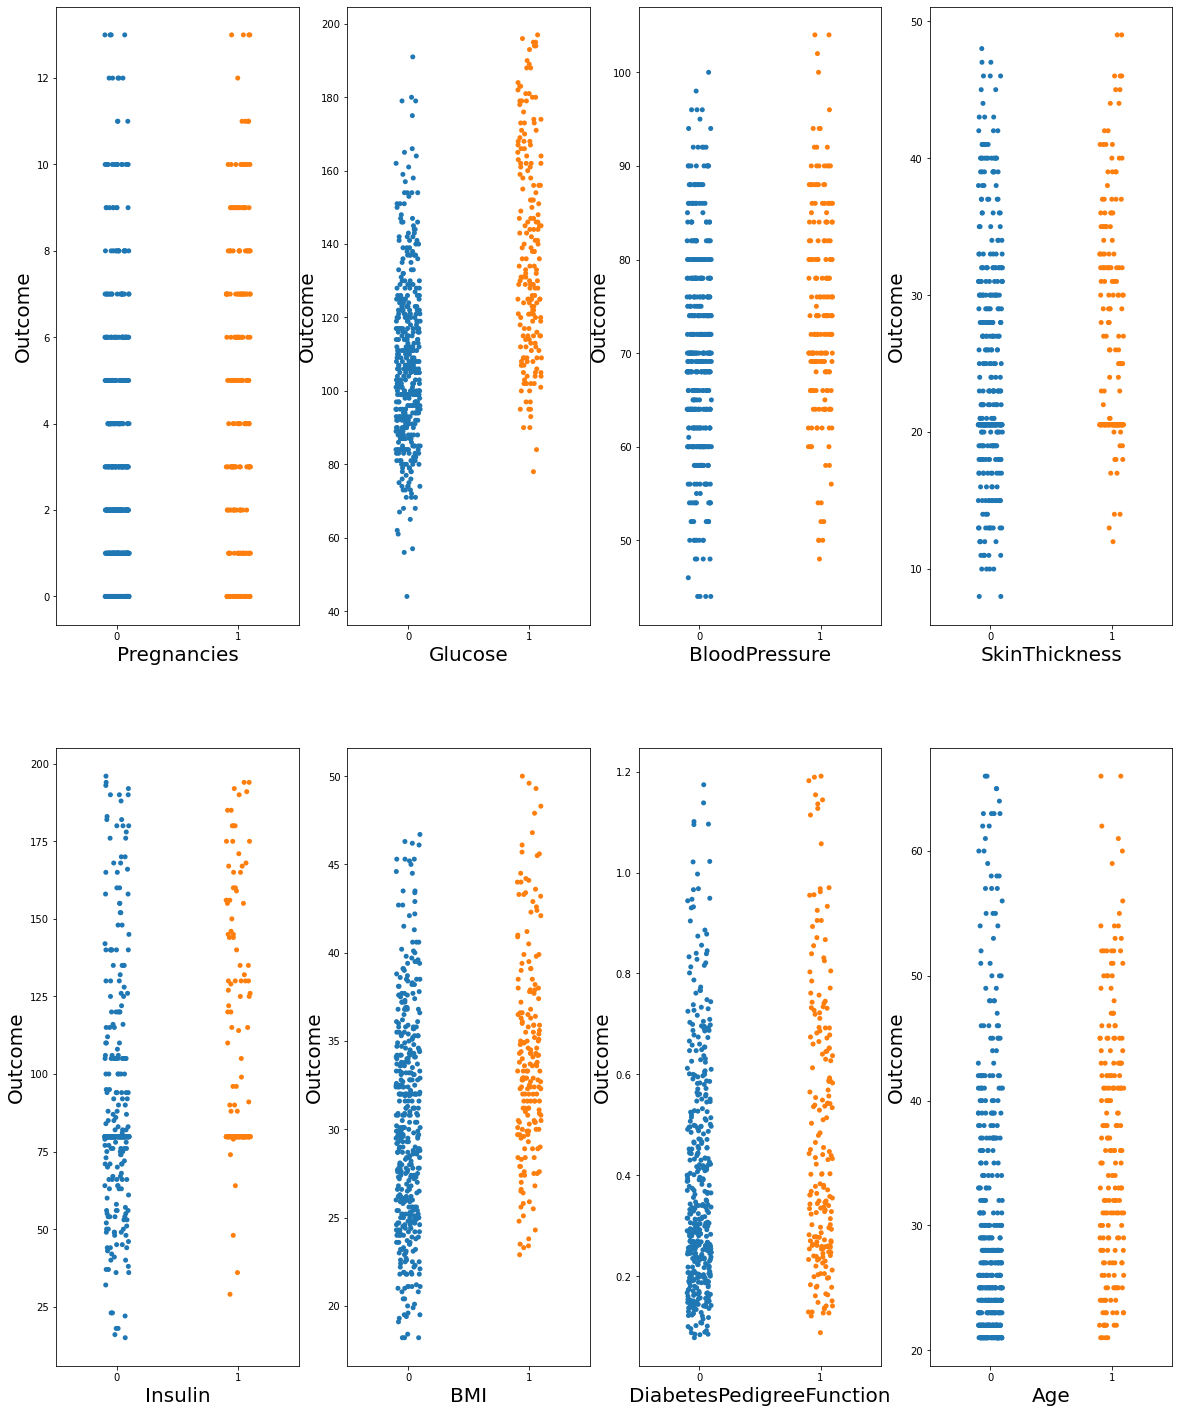

In [48]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1
plt.show()    

In [42]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled.shape[1]

8

In [45]:
vif=pd.DataFrame()

In [46]:
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns

In [47]:
vif

,vif,features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=41)


In [66]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [67]:
import pickle
with open ('modelforpred.sav','wb') as f:
    pickle.dump(log_reg,f)
with open ('Standardscaler.sav','wb') as f:
    pickle.dump(scalar,f)
        

In [68]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0], dtype=int64)

In [69]:
acc=accuracy_score(y_test,y_pred)
acc

0.7548387096774194

In [71]:
Tp=conf_mat[0][0]
Fp=conf_mat[0][1]
Fn=conf_mat[1][0]
Tn=conf_mat[1][1]

In [70]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[92, 10],
       [28, 25]], dtype=int64)

In [82]:
predict_lr=log_reg.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,predict_lr)
for i in range(2,10):
    lsscore=cross_val_score(log_reg,x,y,cv=i)
    lsc=lsscore.mean()
    print('at cv:-',i)
    print('cv score-',lsc*100)
    print('acc_score-',lss*100)

at cv:- 2
cv score- 76.9005115356509
acc_score- 75.48387096774194
at cv:- 3
cv score- 76.57473852070727
acc_score- 75.48387096774194
at cv:- 4
cv score- 77.54922496857981
acc_score- 75.48387096774194
at cv:- 5
cv score- 78.67951744033569
acc_score- 75.48387096774194
at cv:- 6
cv score- 76.90907393577297
acc_score- 75.48387096774194
at cv:- 7
cv score- 77.71778783014737
acc_score- 75.48387096774194
at cv:- 8
cv score- 78.20304695304696
acc_score- 75.48387096774194
at cv:- 9
cv score- 78.52136023491522
acc_score- 75.48387096774194


In [84]:
lsscore_selected=cross_val_score(log_reg,x,y,cv=5).mean()

In [85]:
print('cv score is-',lsscore_selected,'\n accuracy score is-',lss)

cv score is- 0.7867951744033569 
 accuracy score is- 0.7548387096774194


In [72]:
accur=Tp+Tn/(Tp+Fp+Fn+Tn)
accur

92.16129032258064

In [73]:
precision=Tp/(Tp+Fp)
precision

0.9019607843137255

In [74]:
recall=Fp/(Tp+Fn)
recall

0.08333333333333333

In [75]:
f1score=2*(recall*precision)/(recall+precision)
f1score

0.15257048092868986

In [76]:
auc=roc_auc_score(y_test,y_pred)
auc

0.6868294487606365

In [77]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [78]:
fpr

array([0.        , 0.09803922, 1.        ])

In [79]:
tpr

array([0.        , 0.47169811, 1.        ])

In [80]:
thresholds

array([2, 1, 0], dtype=int64)

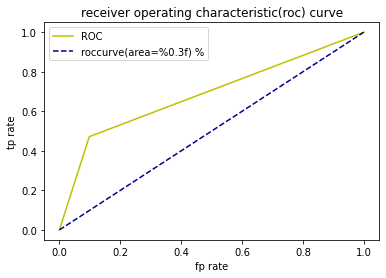

In [81]:
plt.plot(fpr,tpr,color='y',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='roccurve(area=%0.3f) %')
plt.xlabel('fp rate')
plt.ylabel('tp rate')
plt.title('receiver operating characteristic(roc) curve')
plt.legend()
plt.show()